## DATA VISUALIZATION AND DATA ANALYSIS

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('INTRUSION.csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'xAttack'],
      dtype='object')

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['protocol_type','xAttack']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

<Axes: xlabel='xAttack', ylabel='count'>

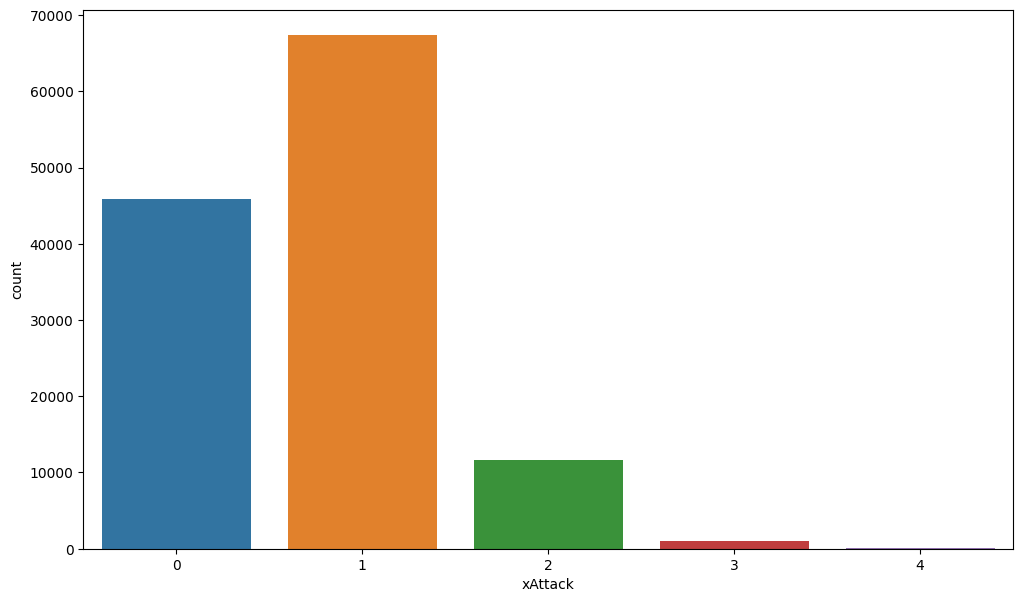

In [5]:
plt.figure(figsize=(12,7))
sns.countplot(x='xAttack',data=df)

(array([102689.,      0.,      0.,      0.,      0.,   8291.,      0.,
             0.,      0.,  14993.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

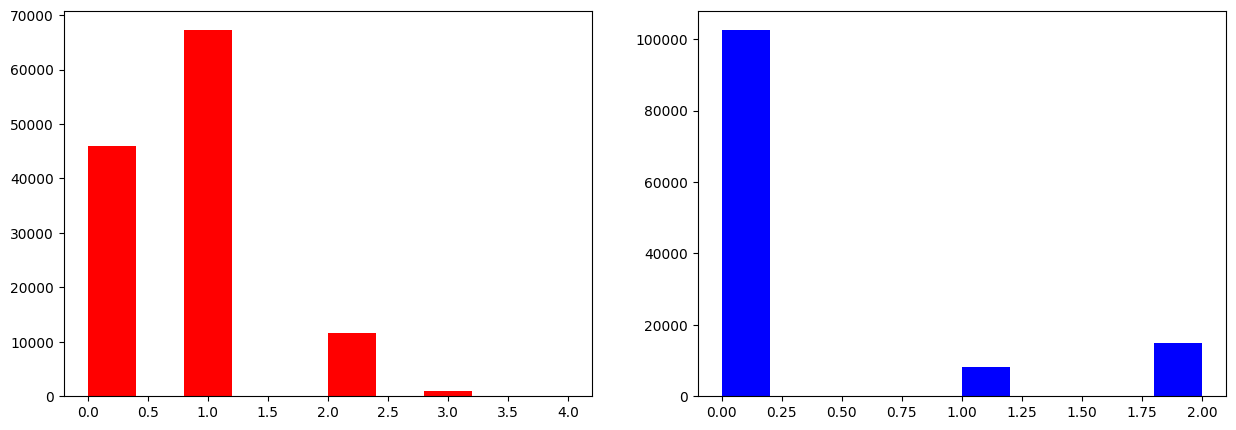

In [6]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(df['xAttack'],color='red')

plt.subplot(1,2,2)
plt.hist(df['protocol_type'],color='blue')


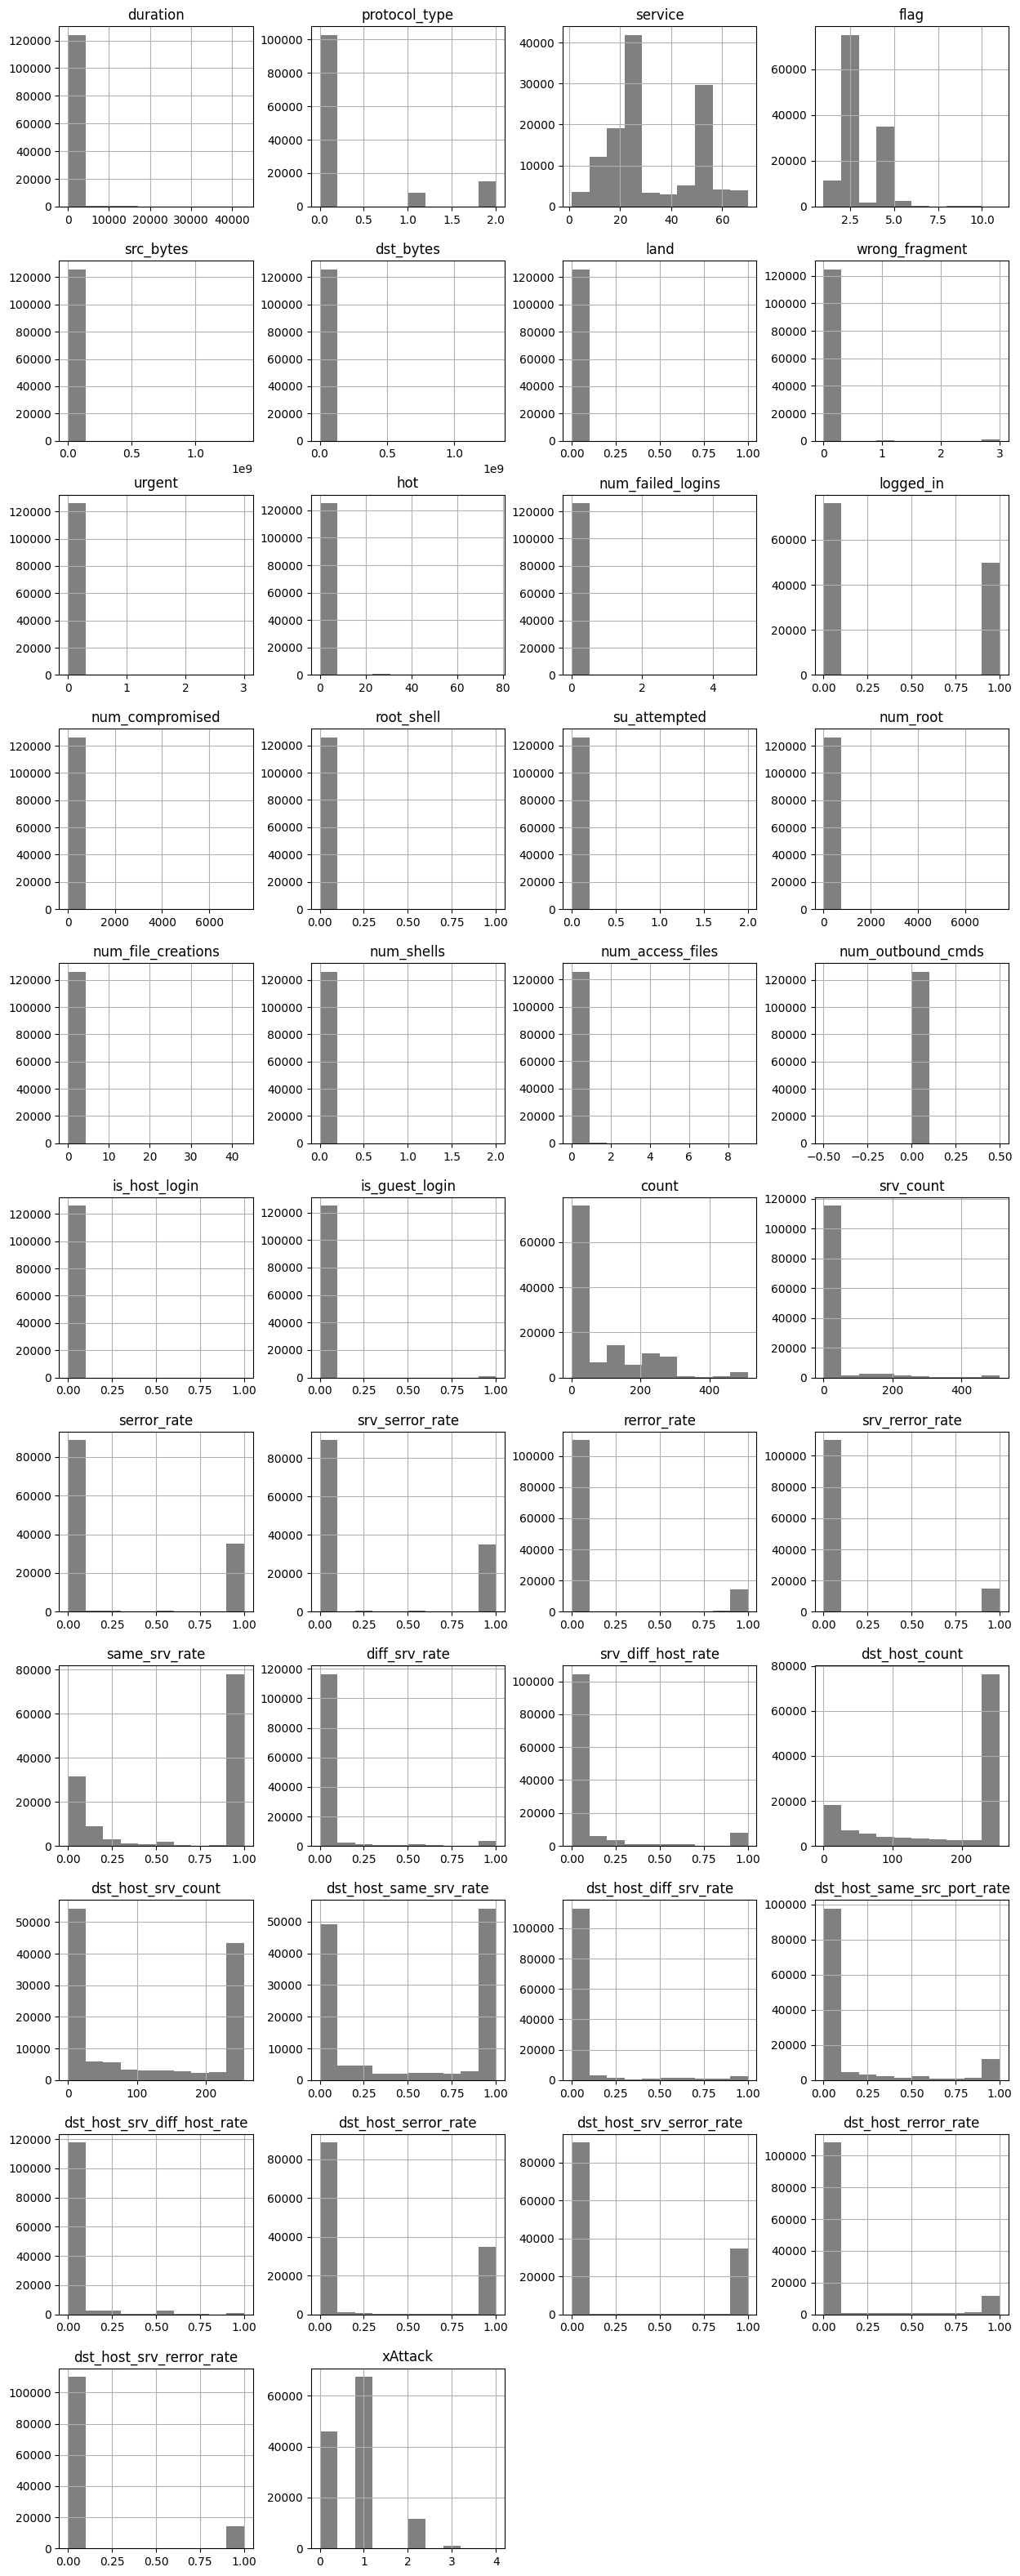

In [7]:
df.hist(figsize=(15,55),layout=(15,4), color='gray')
plt.show()

<Axes: >

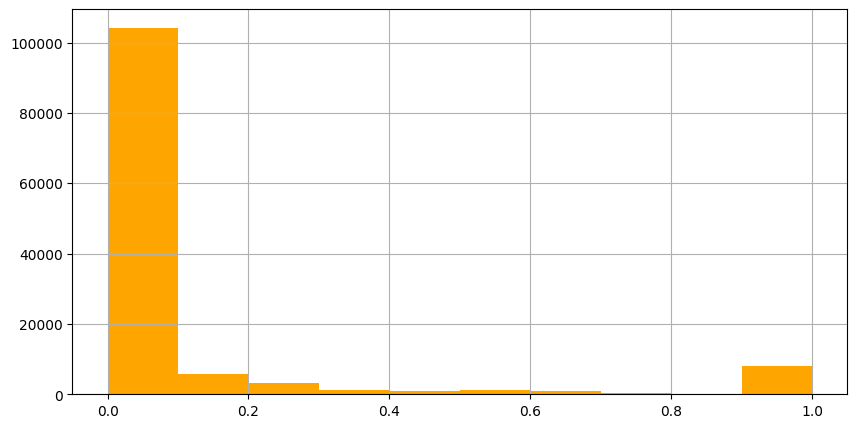

In [8]:
df['srv_diff_host_rate'].hist(figsize=(10,5),color='orange')

<Axes: ylabel='flag'>

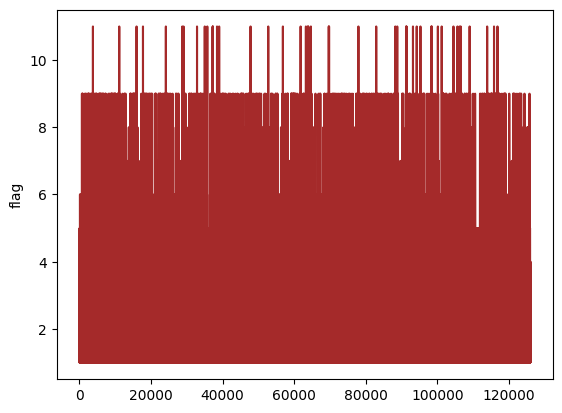

In [9]:
sns.lineplot(df['flag'], color='brown') # scatter, plot, triplot, stackplot

<Axes: >

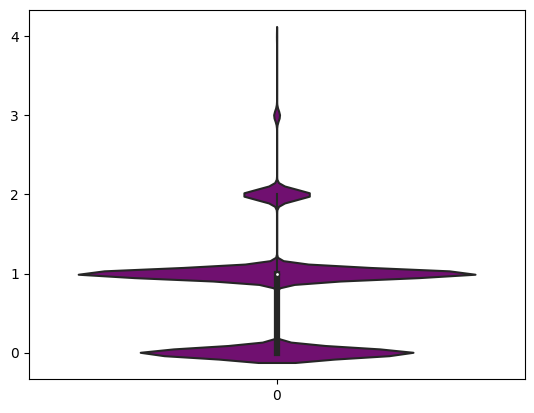

In [10]:
sns.violinplot(df['xAttack'], color='purple') 

<Axes: ylabel='Density'>

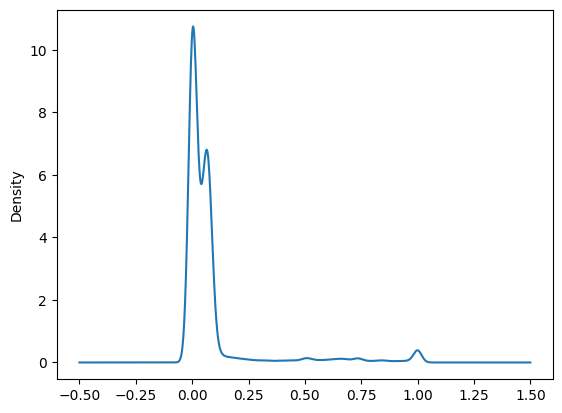

In [11]:
df['dst_host_diff_srv_rate'].plot(kind='density')

In [12]:
# sns.displot(df['src_bytes'], color='purple') 
# barplot, boxenplot, boxplot, countplot, displot, distplot, ecdfplot, histplot, kdeplot, pointplot, violinplot, stripplot

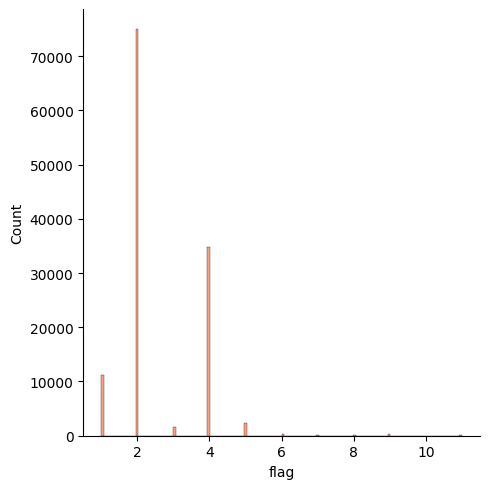

In [13]:
sns.displot(df['flag'], color='coral') # residplot, scatterplot 

xAttack
1    53.46
0    36.46
2     9.25
3     0.79
4     0.04
Name: count, dtype: float64

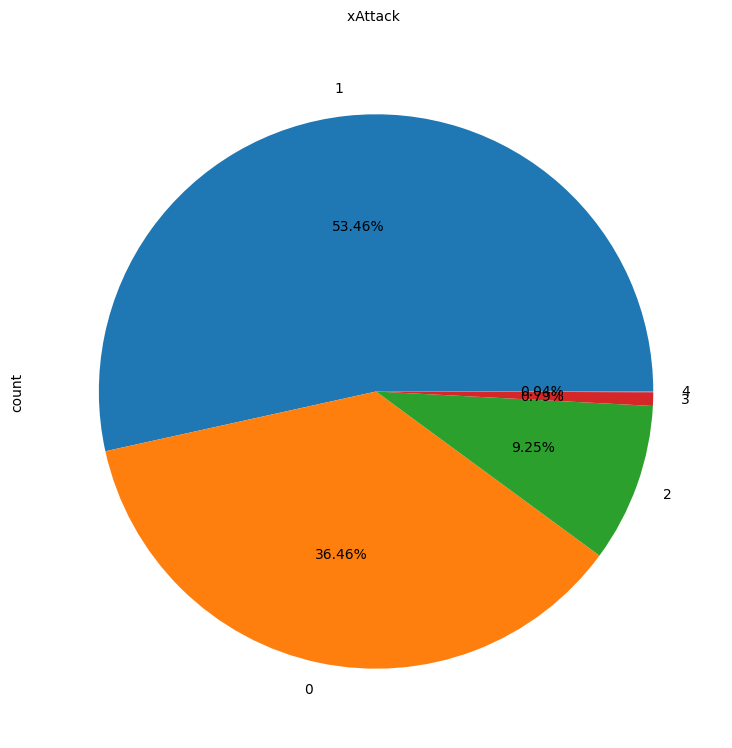

In [14]:
def plot(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(9,9), autopct='%1.2f%%', fontsize = 10)
    ax.set_title(variable + ' \n', fontsize = 10)
    return np.round(dataframe_pie/df.shape[0]*100,2)

plot(df, 'xAttack')